In [2]:
# EDA: basic checks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df = pd.read_csv("../data/raw/diabetes_data_upload.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


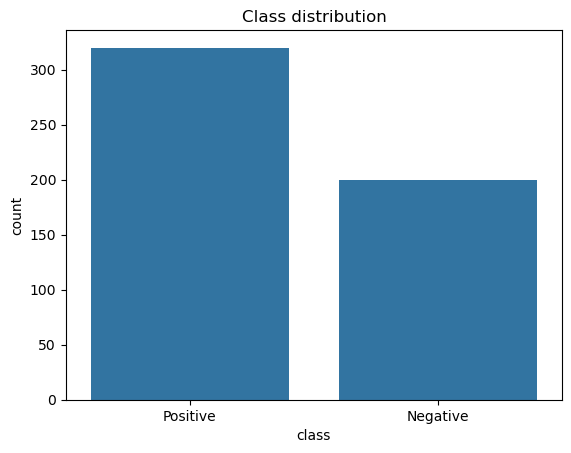

In [3]:
# Class balance
sns.countplot(x='class', data=df)
plt.title("Class distribution")
plt.show()


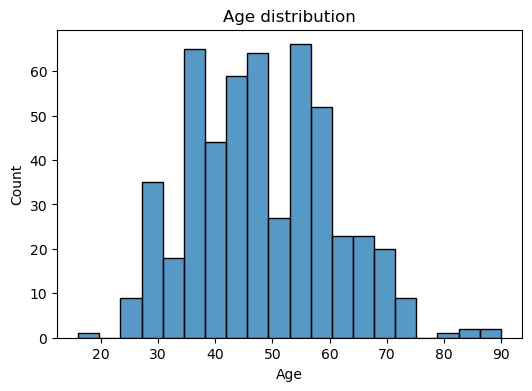

In [4]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20)
plt.title("Age distribution")
plt.show()


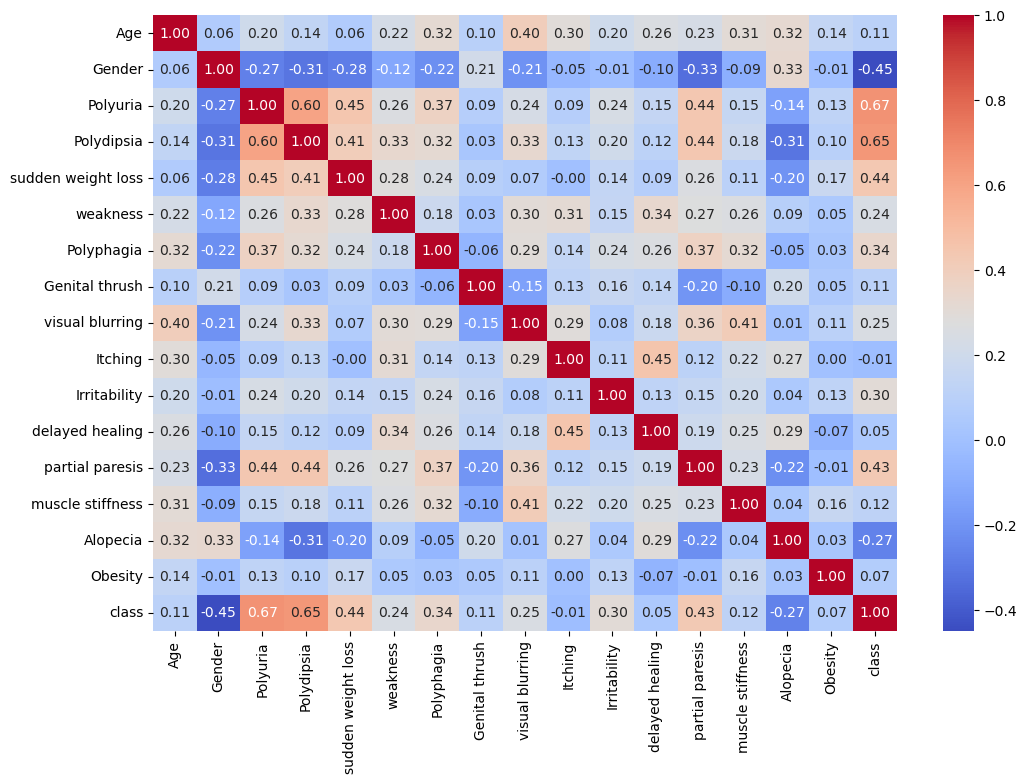

In [12]:
df_encoded = df.copy()

# Encode binary clinical columns (Yes/No)
binary_map = {'Yes':1, 'No':0}
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        if set(df_encoded[col].unique()) <= set(['Yes','No']):
            df_encoded[col] = df_encoded[col].map(binary_map)
        elif col == 'Gender':
            df_encoded[col] = df_encoded[col].map({'Male':1, 'Female':0})
        elif col == 'class':  # Encode target
            df_encoded[col] = df_encoded[col].map({'Positive':1, 'Negative':0})

# Now all columns are numeric
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()